#Riddler Express Solution

##Problem Statement

A friend of yours claims to have shot 17 Free Throws in row after not practicing in a long while. You deem this plausible, but unlikely. Your friend is more skeptical.

Given your friend has a probability of shooting a free throw 70% of the time how many shots would they have to attempt before getting 17 in a row?

## Solution

There is an analytic solution to this problem. Consider the average length of a streak below 17 and the probability of getting more than 17 in a row. One can then deduce the average number of streaks and length of streaks to get the number of shots until starting the 17 in a row.

The probability of getting a streak of exactly $n$ is $p_n = p^n (1-p)$. The probability of getting at least $l$ shots is $1-\sum_{i=0} ^{l-1} p_i = p^{l}$. The expected length of a streak is derived from $\frac{\sum_{i=0} ^{l-1} (i+1)p_i}{1-p^{l}} = l +\frac{1}{1-p}-\frac{l}{1-p^l} $

The average number of streaks required before getting a streak of at least $l$ is given by $\frac{1}{p^l}-1$.

Thus the average number of shots before one begins the $l$ streak is: 
$$\frac{l p + p^{-l}-l - 1}{1 - p}$$ 

For 17 shots and 70% chance:
$$1413$$

## Simulation

In [17]:
from numpy.random import uniform


def take_a_shot(p):
    return uniform()<p


def shoot_until_l(p,l):
    num_shots = 0
    streak = 0
    while streak < l:
        shot = take_a_shot(p)
        num_shots = num_shots+1
        if shot:
            streak = streak+1
        else:
            streak = 0
    return num_shots-l


def simulate(num_rounds,p,l):
    num_shots_dist = []
    for i in range(num_rounds):
        num_shots_dist= num_shots_dist + [shoot_until_l(p,l)]
    return num_shots_dist



In [22]:
num_shot_dist = simulate(100000,0.7,17)

/Users/bphillab/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


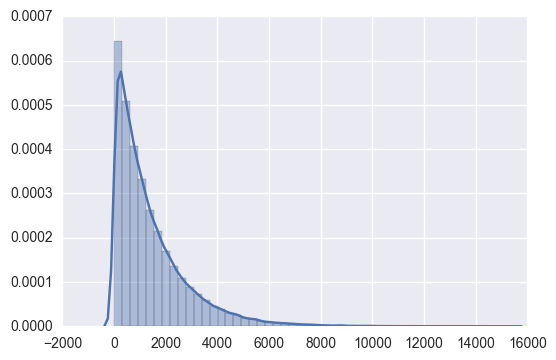

In [24]:
%matplotlib inline
import seaborn as sns
sns.distplot(num_shot_dist)

In [31]:
import numpy as np
np.mean(num_shot_dist)


1405.7694200000001

##Analysis